In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('/Users/sahiljadhav/Documents/scr_proj/credit_rating.xlsx')
grouped = df.groupby('Countries')

In [3]:
matrix = np.zeros((22,22))

In [4]:
for country,group in grouped:
    group_sorted = group.sort_values(by ='Year')
    rating = group_sorted['Ratings_numeric'].tolist() 
    for i in range(len(rating) - 1):
        from_rating = rating[i]
        to_rating = rating[i+1]
        matrix[from_rating][to_rating] += 1

In [5]:
row_sum = np.sum(matrix,axis=1)
for i in range(22):
    for j in range(22):
        matrix[i][j] = matrix[i][j] / row_sum[i]

In [6]:
tpm = pd.DataFrame(matrix,
                   columns = [f"{i}" for i in range(22)],
                   index = [f"{i}" for i in range(22)])

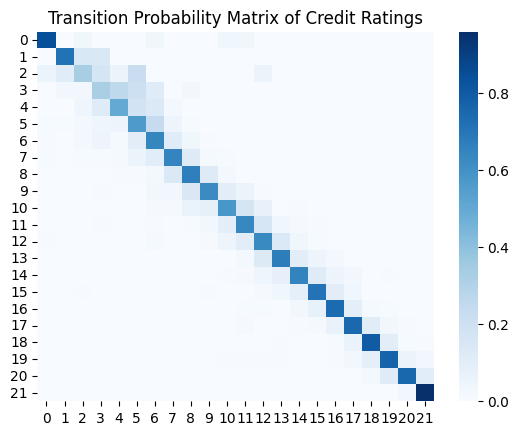

In [7]:
sns.heatmap(tpm ,annot = False, cmap='Blues')
plt.title('Transition Probability Matrix of Credit Ratings')
plt.show()